## Imports

In [1]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#loading dataset
boston_data= load_boston()

In [3]:
#attributes
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
#print(boston_data().DESCR)
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#house prices in thousands
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Working with pandas dataframe

In [6]:
#convert the Bunch datatype into dataframe
data= pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
#add price target to data
data['PRICE']=boston_data.target

In [7]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Taking care of null values

In [8]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## Data visualization 

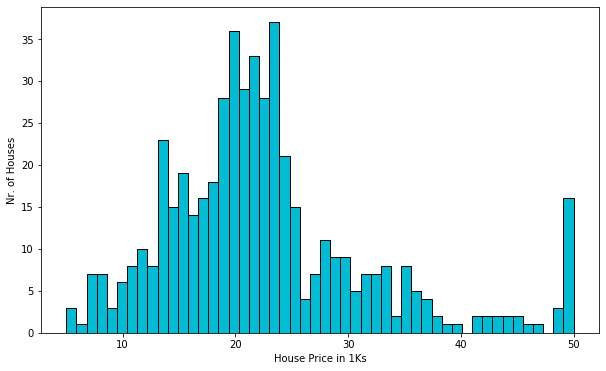

In [10]:
#plot histogram
plt.figure(figsize=[10,6])
plt.hist(data['PRICE'], bins=50, ec='black', color='#00BCD4')
plt.xlabel('House Price in 1Ks')
plt.ylabel('Nr. of Houses')
plt.show()

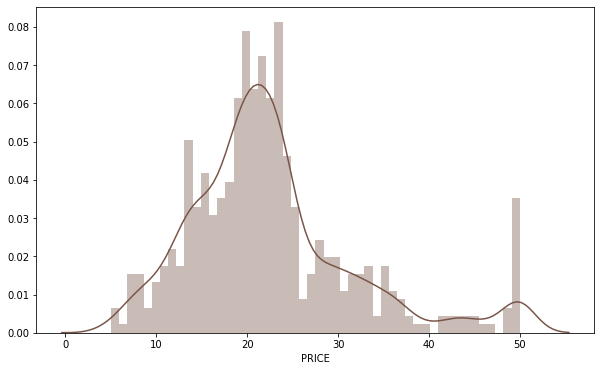

In [11]:
#plot with seaborn
plt.figure(figsize=[10,6])
sns.distplot(data['PRICE'], bins=50, color='#795548')
plt.show()

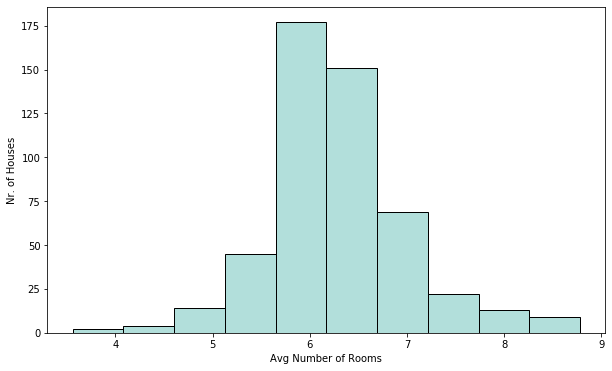

In [12]:
plt.figure(figsize=[10,6])
plt.hist(data['RM'],ec='black', color='#B2DFDB')
plt.xlabel('Avg Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [13]:
data['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

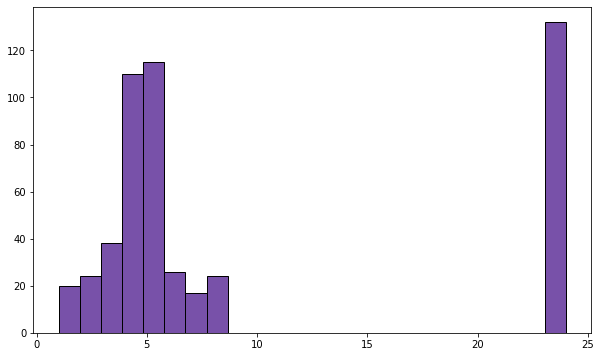

In [14]:
#RM data
plt.figure(figsize=[10,6])
plt.hist(data['RAD'], bins=24,ec='black', color='#7851a9')
plt.show()

In [15]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

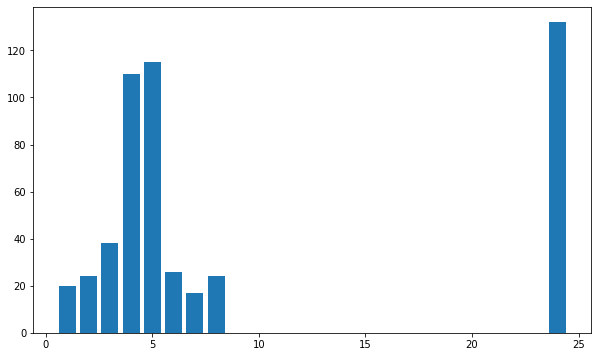

In [16]:
#bar chart
frequency=data['RAD'].value_counts()
plt.figure(figsize=[10,6])
plt.bar(frequency.index, height=frequency)
plt.show()

In [17]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [18]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


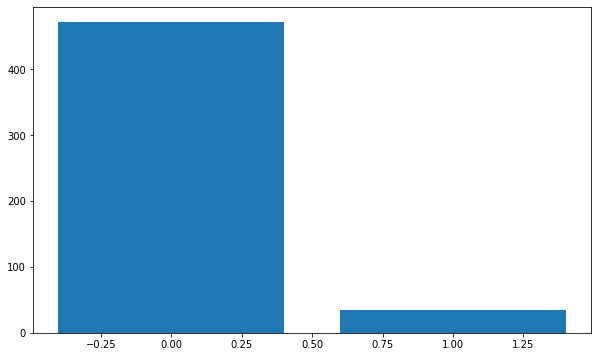

In [19]:
#plot chas
plt.figure(figsize=[10,6])
plt.bar(data['CHAS'].value_counts().index, data['CHAS'].value_counts())
plt.show()

In [20]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Correlation
## $$ \rho_{XY}=corr(X,Y) $$
## $$ -1.0 \leq \rho_{XY} \leq +1.0 $$

In [21]:
#corr between PTRATIO and Prices
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [22]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [23]:
mask=np.zeros_like(data.corr())
triangle_indices= np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

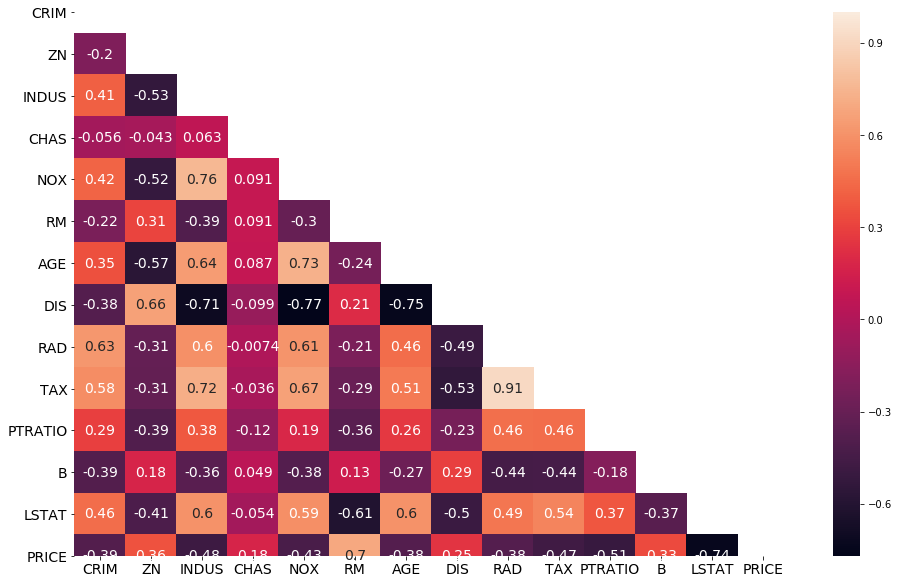

In [24]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(), mask=mask,annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

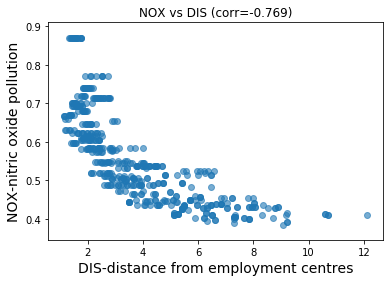

In [25]:
#scatter between NOX and DIS
nox_dis_corr= round(data['NOX'].corr(data['DIS']), 3)

plt.scatter(data['DIS'], data['NOX'], alpha=0.6)
plt.title(f'NOX vs DIS (corr={nox_dis_corr})')

plt.xlabel('DIS-distance from employment centres', fontsize=14)
plt.ylabel('NOX-nitric oxide pollution', fontsize=14)
plt.show()

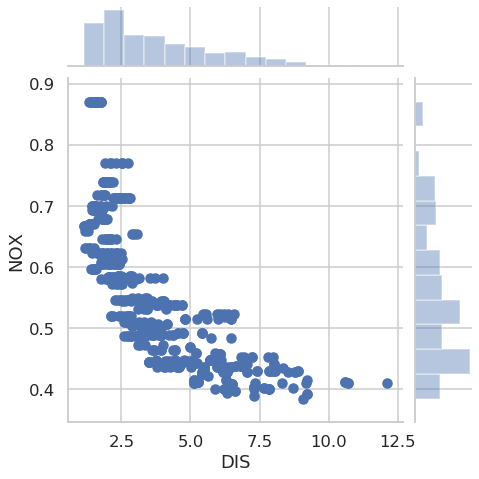

In [26]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(data['DIS'], data['NOX'], height=7)
plt.show()

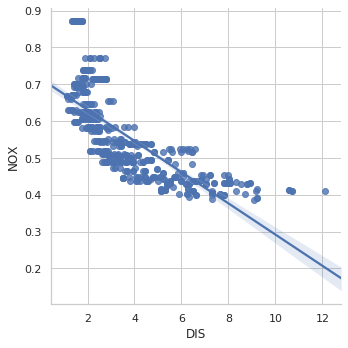

In [27]:
sns.set()
sns.set_style('whitegrid')
sns.lmplot(x='DIS', y='NOX', data=data)
plt.show()

In [28]:
# %%time
# sns.pairplot(data)
# plt.show()

# Training and Testing split

In [29]:
prices= data['PRICE']
features=data.drop('PRICE', axis=1)

In [30]:
X_train, X_test, y_train, y_test=train_test_split(features, prices,
                                                  test_size=0.2, random_state=10)

In [31]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


# Multivariable regression

In [32]:
#multivariate regression
regr= LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print('Intercept: ', regr.intercept_)

Intercept:  36.53305138282439


In [34]:
regr.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [35]:
pd.DataFrame(data=regr.coef_,index=features.columns, columns=['coef'])

,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [36]:
#how well does it fit
print('R-squared for training: ', regr.score(X_train, y_train))
print('R-squared for testing: ', regr.score(X_test, y_test))

R-squared for training:  0.750121534530608
R-squared for testing:  0.6709339839115628


# Evaluation of model
## Data Transformation

In [37]:
prices= np.log(data['PRICE'])
features=data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test=train_test_split(features, prices,
                                                  test_size=0.2, random_state=10)

regr= LinearRegression()
regr.fit(X_train, y_train)

print('R-squared for training: ', regr.score(X_train, y_train))
print('R-squared for testing: ', regr.score(X_test, y_test))

print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=features.columns, columns=['coef'])

R-squared for training:  0.7930234826697583
R-squared for testing:  0.7446922306260724
Intercept:  4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


# Evaluating coefficients & p-values

In [38]:
#import statsmodels.api
X_with_const= sm.add_constant(X_train)

model=sm.OLS(y_train, X_with_const)
results=model.fit()
#results.params
#results.pvalues
pd.DataFrame({'coefs':results.params, 'pvalues': round(results.pvalues, 3)})
#any pvalue >0.05 is not significant
#observed INDUS and AGE are not significant

/home/alienx/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coefs,pvalues
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


# Multicollinearity
## VIF (Variance Inflation Factor)

$$ TAX = \alpha_{0} + \alpha_{1} RM + ......+ \alpha_{12} LSTAT $$
$$ VIF_{TAX}= \frac{1}{1-R_{TAX} ^ 2} $$

In [39]:
#variance_inflation_factor(exog=X_with_const, exog_idx=1)   #for CRIM
#type(X_with_const)
#X_with_const.values converts dataframe into ndarray
variance_inflation_factor(exog=X_with_const.values, exog_idx=1)   #for CRIM

1.7145250443932485

In [40]:
X_with_const.shape

(404, 14)

In [41]:
#for all columns
vif=[variance_inflation_factor(exog=X_with_const.values, exog_idx=i)
    for i in range(14)]
#for i in range(1,14):
#    vif.append(variance_inflation_factor(exog=X_with_const.values, exog_idx=i))
pd.DataFrame({'coef_names': X_with_const.columns, 'VIFs':np.around(vif,2)})
#vif>10 ===> multicollinearity ===> inspection needed

,coef_names,VIFs
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


# Model simplification 
## Feature selection
### Baysian Information Criterion (BIC) to compare between two or more models
#### the lower the BIC better is the model

In [42]:
#original model with log prices and all features
X_with_const= sm.add_constant(X_train)

model=sm.OLS(y_train, X_with_const)
results=model.fit()
#results.params
#results.pvalues
original_coef= pd.DataFrame({'coefs':results.params, 'pvalues': round(results.pvalues, 3)})

In [45]:
#results.summary()
print(results.bic)
print(results.rsquared)

-139.74997769478875
0.7930234826697582


In [47]:
#model without INDUS
X_with_const=sm.add_constant(X_train)
X_with_const=X_with_const.drop(['INDUS'], axis=1)

model=sm.OLS(y_train, X_with_const)
results=model.fit()

coef_minus_indus=pd.DataFrame({'coefs': results.params, 'pvalues': np.around(results.pvalues,3)})
print('BIC: ', results.bic)
print('rsquared: ', results.rsquared)
#BIC is lowered===> model improved

BIC:  -145.14508855591163
rsquared:  0.7927126289415163


In [53]:
#model without AGE and INDUS
X_with_const=sm.add_constant(X_train)
X_with_const=X_with_const.drop(['AGE', 'INDUS'], axis=1)

model=sm.OLS(y_train, X_with_const)
results=model.fit()

coef_minus_age_indus=pd.DataFrame({'coefs': results.params, 'pvalues': np.around(results.pvalues,3)})
print('BIC: ', results.bic)
print('rsquared: ', results.rsquared)

BIC:  -149.49934294224656
rsquared:  0.7918657661852815


In [56]:
frames=[original_coef, coef_minus_indus, coef_minus_age_indus]
pd.concat(frames, axis=1, sort=True)

,coefs,pvalues,coefs,pvalues,coefs,pvalues
AGE,0.000763,0.209,NaN,NaN,NaN,NaN
B,0.000516,0.000,0.000523,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.083941,0.030,0.086449,0.025
CRIM,-0.010672,0.000,-0.010651,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.050898,0.000,-0.052692,0.000
INDUS,0.002030,0.445,0.002053,0.440,NaN,NaN
LSTAT,-0.031390,0.000,-0.030406,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.647738,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034160,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014301,0.000,0.013743,0.000


# Residual analysis
## $$ r= y - \hat {y} $$
### true_value - predicted_value

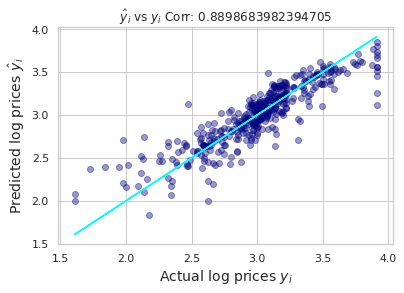

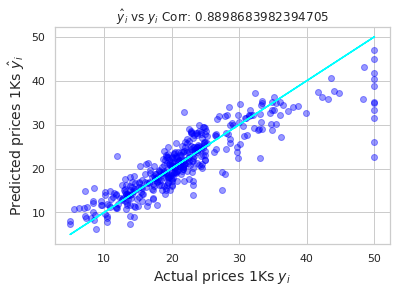

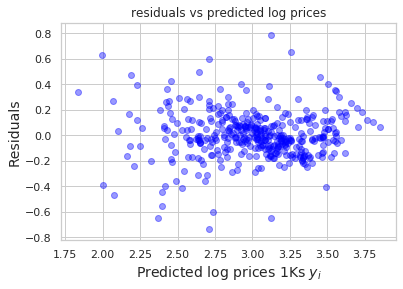

In [81]:
#modified model with log prices and dropped features
prices= np.log(data['PRICE'])
features=data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test=train_test_split(features, prices,
                                                  test_size=0.2, random_state=10)

#using statsmodels
X_with_const= sm.add_constant(X_train)
model= sm.OLS(y_train, X_with_const)
results=model.fit()

#residuals
#residuals= y_train- results.fittedvalues
#type(residuals)
#residuals.describe()
#results.resid

#Graph of actual vs predicted values
corr= y_train.corr(results.fittedvalues)
plt.scatter(x=y_train, y=results.fittedvalues, color='navy', alpha=0.4)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual log prices $ y_i $', fontsize=14)
plt.ylabel('Predicted log prices $ \hat y_i $', fontsize=14)
plt.title(f'$ \hat y_i $ vs $ y_i $ Corr: {corr}')

plt.show()

#without log of prices
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, color='blue', alpha=0.4)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')
plt.xlabel('Actual prices 1Ks $ y_i $', fontsize=14)
plt.ylabel('Predicted prices 1Ks $ \hat y_i $', fontsize=14)
plt.title(f'$ \hat y_i $ vs $ y_i $ Corr: {corr}')

plt.show()

#plotting residuals
plt.scatter(x=results.fittedvalues, y=results.resid, color='blue', alpha=0.4)

plt.xlabel('Predicted log prices 1Ks $ y_i $', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'residuals vs predicted log prices')

plt.show()

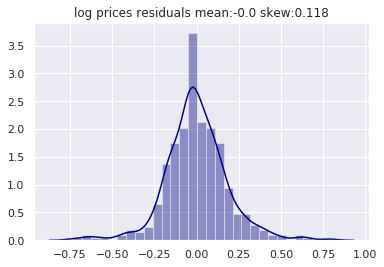

In [88]:
#Distribution of residuals- checking for normality
resid_mean= round(results.resid.mean(), 3)
resid_skew= round(results.resid.skew(),3)
sns.set()
sns.distplot(results.resid,color='navy')
plt.title(f'log prices residuals mean:{resid_mean} skew:{resid_skew}')
plt.show()

In [89]:
#plot these graphs for original model to compare

# making predictions

In [91]:
results.mse_resid

0.034873370823545975